In [1]:
import numpy as np

In [2]:
X = []
Y = []
with open('data_singlevar.txt', 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        Y.append(yt)

In [3]:
num_training = int(0.8*len(X))
num_test = len(X) - num_training

# Training Data
X_train = np.array(X[:num_training]).reshape((num_training,1))
Y_train = np.array(Y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test, 1))
Y_test = np.array(Y[num_training:])

In [4]:
from sklearn import linear_model

In [5]:
# Create linear regression object
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
import matplotlib.pyplot as plt

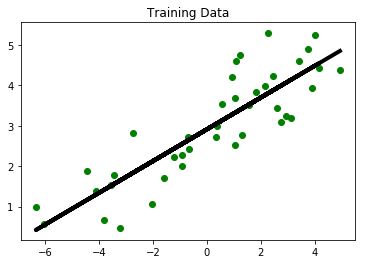

In [7]:
y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, Y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title("Training Data")
plt.show()

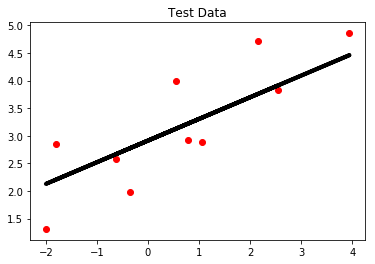

In [8]:
y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)

plt.title("Test Data")
plt.show()

## Computing Regression Accuracy

In [9]:
import sklearn.metrics as sm

In [10]:
print("Mean absolute error = ", round(sm.mean_absolute_error(Y_test, y_test_pred), 2))

Mean absolute error =  0.54


In [11]:
print("Mean squared error = ", round(sm.mean_squared_error(Y_test, y_test_pred), 2))

Mean squared error =  0.38


In [12]:
print("Median absolute error = ", round(sm.median_absolute_error(Y_test, y_test_pred), 2))

Median absolute error =  0.54


In [13]:
print("Explained variance score = ", round(sm.explained_variance_score(Y_test, y_test_pred), 2))

Explained variance score =  0.68


In [14]:
print("R2 score = ", round(sm.r2_score(Y_test, y_test_pred), 2))

R2 score =  0.68


## Achieving Model Persistence

In [15]:
import pickle

In [16]:
output_model_file = 'saved_model.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

In [18]:
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)

## Building a Polynomial Regressor

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
polynomial = PolynomialFeatures(degree=3)

In [21]:
X_train_transformed = polynomial.fit_transform(X_train)

In [22]:
datapoint = [0.39, 2.78, 7.11]
poly_datapoint = polynomial.fit_transform(datapoint)
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, Y_train)

/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#print("Linear Regression: ", linear_regressor.predict(datapoint)[0])
print("Polynomial Regression: ", poly_linear_model.predict(poly_datapoint)[0])

ValueError: shapes (1,20) and (4,) not aligned: 20 (dim 1) != 4 (dim 0)